# EX1 迷路問題 Maze Problem<br>
<br>

・強化学習の1つであるQラーニングを用いる<br>
・This time, we use O-learning, which is one of the reinforcement learning.<br>
<br>
・エージェントは1つだけ用いる<br>
・We use only one agent.


In [273]:
import numpy as np
import random
import matplotlib.pyplot as plt

action = 0: 上 Up<br>
action = 1: 下 Down<br>
action = 2: 左 Left<br>
action = 3: 右 Right<br>

変数の設定 Settings of variables

迷路の例 Example of maze<br>
<br>
maze_size = 7の時 if maze_size = 7<br>
<br>
|W|W|W|W|W|W|W|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|W||W|W||G|W|
|W|||||W|W|
|W|W||W|W||W|
|W|W|||||W|
|W|S|||W||W|
|W|W|W|W|W|W|W|


W:壁 Wall<br>
S:開始地点 Starting point<br>
G:終了地点 Goal point<br>
<br>
state image<br>
|42|43|44|45|46|47|48|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|35|36|37|38|39|40|41|
|28|29|30|31|32|33|34|
|21|22|23|24|25|26|27|
|14|15|16|17|18|19|20|
|7|8|9|10|11|12|13|
|0|1|2|3|4|5|6|

In [274]:
maze_size = 7  #迷路のサイズ size of the maze
num_episodes = maze_size ** 2 * 5  #総試行回数 total number of trials
gamma = 0.9  #割引率 discount rate
alpha = 0.5  #学習係数 learning rate

迷路の初期化 Initialize maze

In [275]:
def initialize_maze(maze_size):
    maze = np.full(maze_size**2, "W")
    maze_TF = False
    for state in range(maze_size**2):
        if (state < maze_size) or (state >= maze_size*(maze_size - 1)) or (state % maze_size == 0) or (state % maze_size == maze_size - 1):
            maze[state] = "E"
        elif (state == maze_size + 1):
            maze[state] = "S"
        elif (state == maze_size**2 - maze_size - 2):
            maze[state] = "G"
    
    left_node = [maze_size + 1]
    position = maze_size + 1
    G_dig = False
    
    while len(left_node) > 0:
        position = left_node[-1]
        option_list, G_dig = get_option(maze, position, maze_size, G_dig)
        if len(option_list) > 0:
            next_position = random.choice(option_list)
            if (maze[next_position] != "G") and (maze[next_position] != "S"):
                maze[next_position] = ""
            if (next_position == maze_size**2 - 2 * maze_size - 2) or (next_position == maze_size**2 - maze_size - 3):
                G_dig = True
            left_node.append(next_position)
        else:
            popped_item = left_node.pop(-1)
    
    for state in range(maze_size**2):
        if maze[state] == "E":
            maze[state] = "W"
    
    show_maze(maze, maze_size)
    return maze

def get_option(maze, position, maze_size, G_dig):
    option_list = []
    if get_type(maze, position, maze_size, "up") == "W":
        dig_TF, G_dig = judge_dig(maze, position + maze_size, maze_size, "up", G_dig)
        if dig_TF:
            option_list.append(position + maze_size)
    if get_type(maze, position, maze_size, "down") == "W":
        dig_TF, G_dig = judge_dig(maze, position - maze_size, maze_size, "down", G_dig)
        if dig_TF:
            option_list.append(position - maze_size)
    if get_type(maze, position, maze_size, "left") == "W":
        dig_TF, G_dig = judge_dig(maze, position - 1, maze_size, "left", G_dig)
        if dig_TF:
            option_list.append(position - 1)
    if get_type(maze, position, maze_size, "right") == "W":
        dig_TF, G_dig = judge_dig(maze, position + 1, maze_size, "right", G_dig)
        if dig_TF:
            option_list.append(position + 1)
    return option_list, G_dig

def get_type(maze, position, maze_size, move):
    if move == "up":
        return maze[position + maze_size]
    elif move == "down":
        return maze[position - maze_size]
    elif move == "left":
        return maze[position - 1]
    elif move == "right":
        return maze[position + 1]

def judge_dig(maze, position, maze_size, move, G_dig):
    count = 0
    if move != "up":
        if G_dig:
            if (get_type(maze, position, maze_size, "down") == "W") or (get_type(maze, position, maze_size, "down") == "E"):
                count += 1
        else:
            if (get_type(maze, position, maze_size, "down") == "W") or (get_type(maze, position, maze_size, "down") == "E") or (get_type(maze, position, maze_size, "down") == "G"):
                count += 1
    if move != "down":
        if G_dig:
            if (get_type(maze, position, maze_size, "up") == "W") or (get_type(maze, position, maze_size, "up") == "E"):
                count += 1
        else:
            if (get_type(maze, position, maze_size, "up") == "W") or (get_type(maze, position, maze_size, "up") == "E") or (get_type(maze, position, maze_size, "up") == "G"):
                count += 1
    if move != "left":
        if G_dig:
            if (get_type(maze, position, maze_size, "right") == "W") or (get_type(maze, position, maze_size, "right") == "E"):
                count += 1
        else:
            if (get_type(maze, position, maze_size, "right") == "W") or (get_type(maze, position, maze_size, "right") == "E") or (get_type(maze, position, maze_size, "right") == "G"):
                count += 1
    if move != "right":
        if G_dig:
            if (get_type(maze, position, maze_size, "left") == "W") or (get_type(maze, position, maze_size, "left") == "E"):
                count += 1
        else:
            if (get_type(maze, position, maze_size, "left") == "W") or (get_type(maze, position, maze_size, "left") == "E") or (get_type(maze, position, maze_size, "left") == "G"):
                count += 1
            
    if count == 3:
        return True, G_dig
    else:
        return False, G_dig    

def show_maze(maze, maze_size):
    sentence = ""
    for index_i in range(maze_size):
        sentence += "|"
        for index_j in range(maze_size):
            index_type = maze[maze_size * (maze_size - index_i - 1) + index_j]
            if index_type == "":
                sentence += " |"
            else:
                sentence += index_type + "|"
        sentence += "\n"
    print(sentence)

迷路内移動 Move

In [276]:
def move(state, action, maze_size):
    if action == 0:  #up
        state += maze_size
    elif action == 1:  #down
        state -= maze_size
    elif action == 2:  #left
        state -= 1
    elif action == 3:  #right
        state += 1
    return state

状態遷移：状態を変化させるための関数<br>
State transition: The function used to change state

In [277]:
def step(maze, state, action, maze_size):
    reward = 0
    new_state = move(state, action, maze_size)
    ### Please fill here!! ###
    #適切に報酬と移動先を設定してください!
    #Set rewards and destinations appropriately!
    #(注意点)move関数は移動先が壁であるか判定していません
    #(Note)"move" function does not check whether the destination is a wall.
    max_reward, min_reward = 0, 0
    
    ##########################
    return new_state, reward, max_reward, min_reward

行動選択：Q値から次の行動を選択するための関数<br>
Select actions: The function to select next action from Q-value

In [278]:
def getAction(maze, state, epsilon, qv):
    #徐々に最適行動のみをとる、ε-greedy法
    #gradually take the optimal behavior at that time, ε-greedy method
    if epsilon > np.random.uniform(0, 1):
        next_action = np.random.choice([0, 1, 2, 3])
    else:
        a = np.where(qv[state]==qv[state].max())[0]
        #その時点での最適行動が複数ある場合はランダムに選択
        #If there are multiple optimal actions at that time, select randomly from them
        next_action = np.random.choice(a)
    return next_action

Q値の更新：状態，行動，報酬，次の状態を用いてQ値を更新するための関数<br>
Update Q-value: The function to update Q-value based on the current state, the behavior, the reward and the next state

In [279]:
def updateQValue(qv, state, action, reward, next_state, gamma, alpha):
    next_maxQ=max(qv[next_state])
    qv[state, action] = (1 - alpha) * qv[state, action] + alpha * (reward + gamma * next_maxQ)
    return qv

Q値の可視化 Visualize Q-value

In [280]:
def show_Qvalue(qv, maze, maze_size, max_reward, min_reward):
    split = 2
    cm = plt.get_cmap("coolwarm")
    for state_i in range(len(qv)):
        x_min = state_i % maze_size
        x_max = x_min + 1
        x_mid = (x_max + x_min) / 2
        y_min = state_i // maze_size
        y_max = y_min + 1
        if (maze[state_i] == "W"):
            x = np.linspace(x_min, x_max, split)
            plt.fill_between(x, y_min, y_max, color = "gray")
        else:
            x1 = np.linspace(x_min, x_mid, split)
            x2 = np.linspace(x_mid, x_max, split)
            up_value = normalize_qv(qv[state_i, 0], max_reward, min_reward)
            plt.fill_between(x1, y_max + x_min - x1, y_max, color = cm(up_value))
            plt.fill_between(x2, y_min + x2 - x_min, y_max, color = cm(up_value))
            down_value = normalize_qv(qv[state_i, 1], max_reward, min_reward)
            plt.fill_between(x1, y_min, y_min + x1 - x_min, color = cm(down_value))
            plt.fill_between(x2, y_min, y_max + x_min - x2, color = cm(down_value))
            left_value = normalize_qv(qv[state_i, 2], max_reward, min_reward)
            plt.fill_between(x1, y_min + x1 - x_min, y_max + x_min - x1, color = cm(left_value))
            right_value = normalize_qv(qv[state_i, 3], max_reward, min_reward)
            plt.fill_between(x2, y_max + x_min - x2, y_min + x2 - x_min, color = cm(right_value))
    #plt.colorbar()
    plt.show()

def normalize_qv(value, max_reward, min_reward):
    if min_reward < 0:
        if value < 0:
            return (value - min_reward) / (0 - min_reward) * 0.5
        else:
            return 0.5 + value / max_reward * 0.5
    else:
        return (value - min_reward) / (max_reward - min_reward)

強化学習の実行 Do reinforcement learning

|W|W|W|W|W|W|W|
|W| |W| |W|G|W|
|W| | | |W| |W|
|W| |W|W| | |W|
|W| |W| | |W|W|
|W|S| | |W|W|W|
|W|W|W|W|W|W|W|

state: 8  action: 1  next state: 8  reward: -1
state: 8  action: 2  next state: 8  reward: -1
state: 8  action: 2  next state: 8  reward: -1
state: 8  action: 3  next state: 9  reward: 0
state: 9  action: 1  next state: 9  reward: -1
state: 9  action: 3  next state: 10  reward: 0
state: 10  action: 3  next state: 10  reward: -1
state: 10  action: 0  next state: 17  reward: 0
state: 17  action: 0  next state: 17  reward: -1
state: 17  action: 3  next state: 18  reward: 0
state: 18  action: 1  next state: 18  reward: -1
state: 18  action: 0  next state: 25  reward: 0
state: 25  action: 1  next state: 18  reward: 0
state: 18  action: 0  next state: 25  reward: 0
state: 25  action: 0  next state: 25  reward: -1
state: 25  action: 1  next state: 18  reward: 0
state: 18  action: 0  next state: 25  reward: 0
state: 25  action: 3  next state: 26  reward: 0
state: 26  action: 1  next

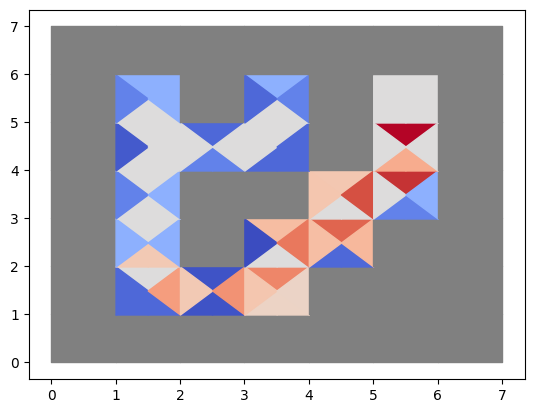

In [281]:
QV = np.zeros((maze_size**2, 4))
maze = initialize_maze(maze_size)
max_reward, min_reward = 0, 0
for episode in range(num_episodes):  #試行数分繰り返す loop for the number of trials
    state = maze_size + 1#初期状態に戻す reset to initial state
    sum_reward = 0#累積報酬 cumulative reward
    epsilon = 0.5 * (1 / (episode + 1))
    goal_TF = False
    while (not goal_TF):  #1試行のループ loop for one trial
        action = getAction(maze, state, epsilon, QV)    # a_{t+1} 
        next_state, reward, max_reward, min_reward = step(maze, state, action, maze_size)
        print("state:", state, " action:", action, " next state:", next_state, " reward:", reward)
        sum_reward += reward  #報酬を追加 add reward
        QV = updateQValue(QV, state, action, reward, next_state, gamma, alpha)
        state = next_state
        if (maze[state] == "G"):
            goal_TF = True
    print('episode : %d total reward %d' %(episode+1, sum_reward))
    print(QV)
show_Qvalue(QV, maze, maze_size, max_reward, min_reward)